In [773]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [696]:
# Load the dataset
df = pd.read_csv("Train.csv")

# View the first 5 rows
df.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750


In [697]:
# Shape of the dataset
df.shape

(5898, 15)

In [698]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   int64  
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   int64  
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 691.3+ KB


In [699]:
# Statistial summary
df.describe()

,ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000
mean,54964.183452,0.910817,0.854527,0.120210,0.107664,7782.026958,1245.954548,97.410478,359.114954,0.920482,1.183961,0.832994,5239.284503
std,26133.640949,0.285032,0.352607,0.325235,0.309981,9182.571831,2368.012349,103.483478,48.876088,0.270569,0.730568,0.373013,2308.679455
min,10002.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.000000,1963.000000
25%,32337.000000,1.000000,1.000000,0.000000,0.000000,2342.250000,0.000000,17.000000,357.000000,1.000000,1.000000,1.000000,3750.000000
50%,55501.000000,1.000000,1.000000,0.000000,0.000000,6989.000000,117.562275,42.000000,368.000000,1.000000,1.000000,1.000000,6000.000000
75%,77775.750000,1.000000,1.000000,0.000000,0.000000,8375.000000,1680.894542,174.000000,372.000000,1.000000,2.000000,1.000000,6000.000000
max,99998.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,2.000000,1.000000,22500.000000


In [700]:
# Check for missing values
df.isnull().sum()

ID                   0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

In [701]:
# Convert Dependents to numeric
# Replace '3+' with 3 and convert to integer
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

In [702]:
# Confirm if it changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   int32  
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   int64  
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   int64  
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(1), int32(1), int64(12), object(1)
memory usage: 668.3+ KB


In [703]:
# Check the distribution of the target variable
df['Loan_Status'].value_counts(normalize=True)

Loan_Status
1    0.832994
0    0.167006
Name: proportion, dtype: float64

In [704]:
df['Loan_Status'].value_counts()

Loan_Status
1    4913
0     985
Name: count, dtype: int64

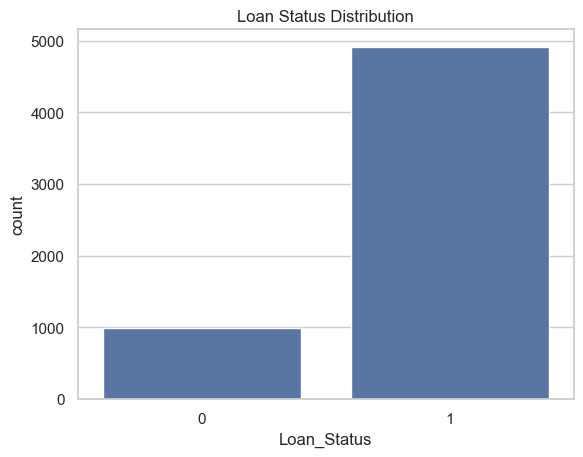

In [705]:
# Visualization of the target variable
sns.countplot(data=df, x='Loan_Status')
plt.title('Loan Status Distribution')
plt.show()

In [706]:
# To check the categorical features
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']

In [707]:
#Note: This will show you how each category is distributed in the data — e.g., how many applicants are male vs female, married vs single, etc.
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(normalize=True))


--- Gender ---
Gender
1    0.910817
0    0.089183
Name: proportion, dtype: float64

--- Married ---
Married
1    0.854527
0    0.145473
Name: proportion, dtype: float64

--- Education ---
Education
0    0.87979
1    0.12021
Name: proportion, dtype: float64

--- Self_Employed ---
Self_Employed
0    0.892336
1    0.107664
Name: proportion, dtype: float64

--- Property_Area ---
Property_Area
1    0.432519
2    0.375721
0    0.191760
Name: proportion, dtype: float64

--- Dependents ---
Dependents
0    0.620380
1    0.196168
3    0.092574
2    0.090878
Name: proportion, dtype: float64


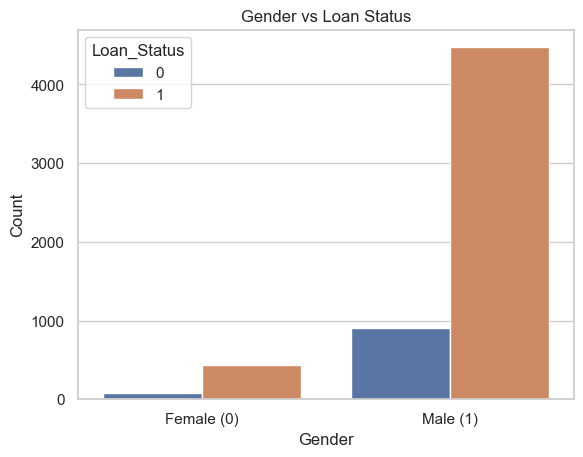

In [708]:
# Data Visualization
# Relationship between the categorical and target variable
# Gender vs Loan Status
sns.countplot(data=df, x='Gender', hue='Loan_Status')
plt.title("Gender vs Loan Status")
plt.xticks([0, 1], ['Female (0)', 'Male (1)'])
plt.ylabel("Count")
plt.show()

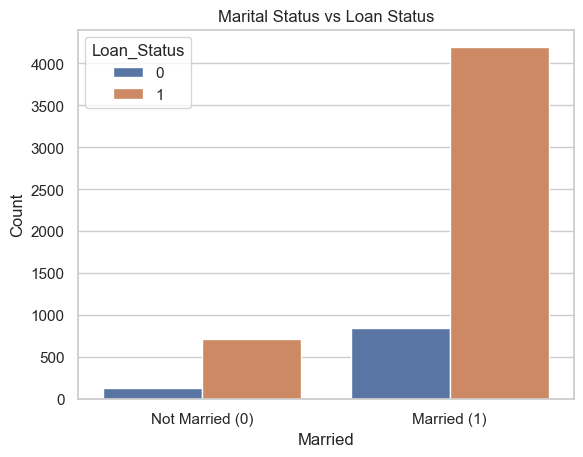

In [709]:
# Married vs Loan Status
sns.countplot(data=df, x='Married', hue='Loan_Status')
plt.title("Marital Status vs Loan Status")
plt.xticks([0, 1], ['Not Married (0)', 'Married (1)'])
plt.ylabel("Count")
plt.show()

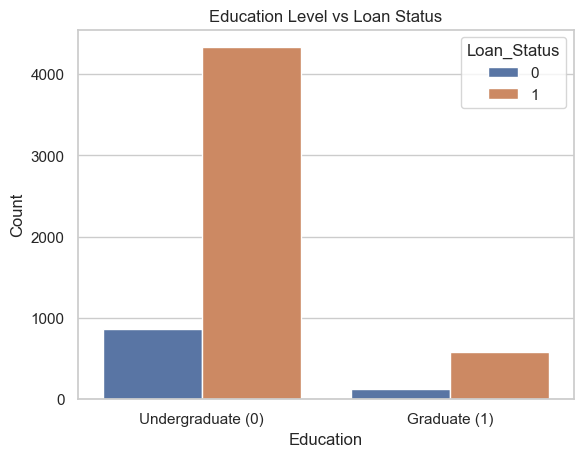

In [710]:
# Education vs Loan Status
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title("Education Level vs Loan Status")
plt.xticks([0, 1], ['Undergraduate (0)', 'Graduate (1)'])
plt.ylabel("Count")
plt.show()

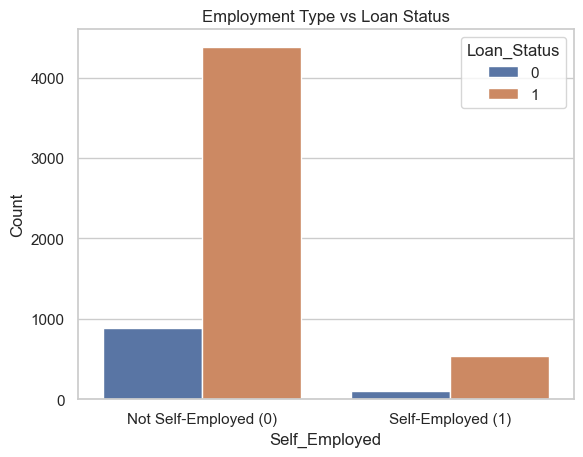

In [711]:
# Self Employed vs Loan Status
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status')
plt.title("Employment Type vs Loan Status")
plt.xticks([0, 1], ['Not Self-Employed (0)', 'Self-Employed (1)'])
plt.ylabel("Count")
plt.show()

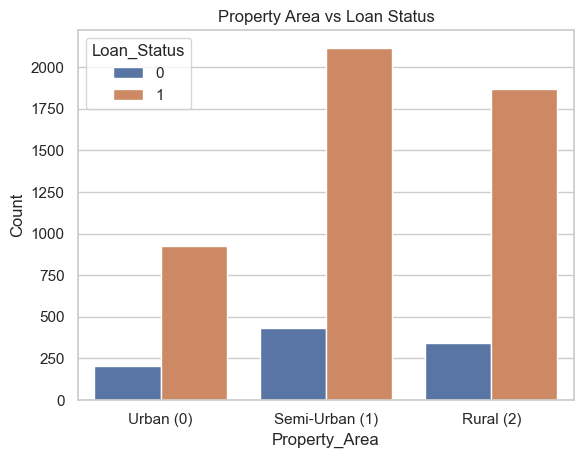

In [712]:
# Property Area vs Loan Status
sns.countplot(data=df, x='Property_Area', hue='Loan_Status')
plt.title("Property Area vs Loan Status")
plt.xticks([0, 1, 2], ['Urban (0)', 'Semi-Urban (1)', 'Rural (2)'])
plt.ylabel("Count")
plt.show()


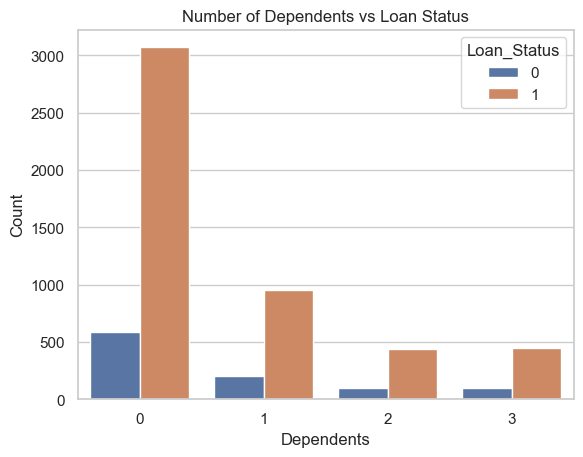

In [713]:
# Dependents vs Loan Status
sns.countplot(data=df, x='Dependents', hue='Loan_Status')
plt.title("Number of Dependents vs Loan Status")
plt.ylabel("Count")
plt.show()

In [714]:
# To confirm if ApplicantIncome + CoapplicantIncome = Total_Income
print(df[['ApplicantIncome', 'CoapplicantIncome', 'Total_Income']].head())

   ApplicantIncome  CoapplicantIncome  Total_Income
0             8328           0.000000          6000
1              150        3857.458782          6000
2             4989         314.472511          6000
3              150           0.000000          3750
4             8059           0.000000          3750


In [715]:
# Drop incorrect Total_Income column
df.drop('Total_Income', axis=1, inplace=True)

# Recalculate Total_Income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Confirm the fix
print(df[['ApplicantIncome', 'CoapplicantIncome', 'Total_Income']].head())

   ApplicantIncome  CoapplicantIncome  Total_Income
0             8328           0.000000   8328.000000
1              150        3857.458782   4007.458782
2             4989         314.472511   5303.472511
3              150           0.000000    150.000000
4             8059           0.000000   8059.000000


In [716]:
# Summary statistics of Applicant Income
print(df['ApplicantIncome'].describe())

count     5898.000000
mean      7782.026958
std       9182.571831
min        150.000000
25%       2342.250000
50%       6989.000000
75%       8375.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


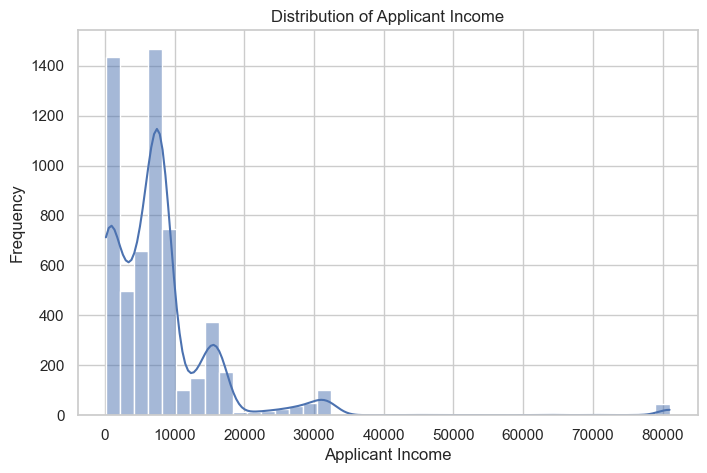

In [717]:
# Distribution plot
plt.figure(figsize=(8,5))
sns.histplot(df['ApplicantIncome'], bins=40, kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

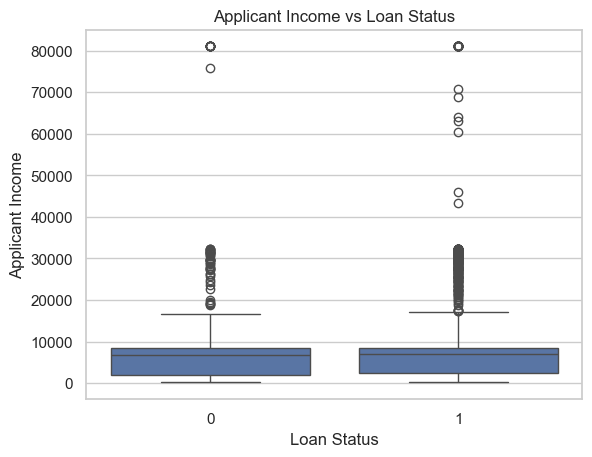

In [718]:
# Loan Status vs Applicant Income
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

In [719]:
# Statistical summary of Coapplicant Income
print(df['CoapplicantIncome'].describe())

count     5898.000000
mean      1245.954548
std       2368.012349
min          0.000000
25%          0.000000
50%        117.562275
75%       1680.894542
max      20000.000000
Name: CoapplicantIncome, dtype: float64


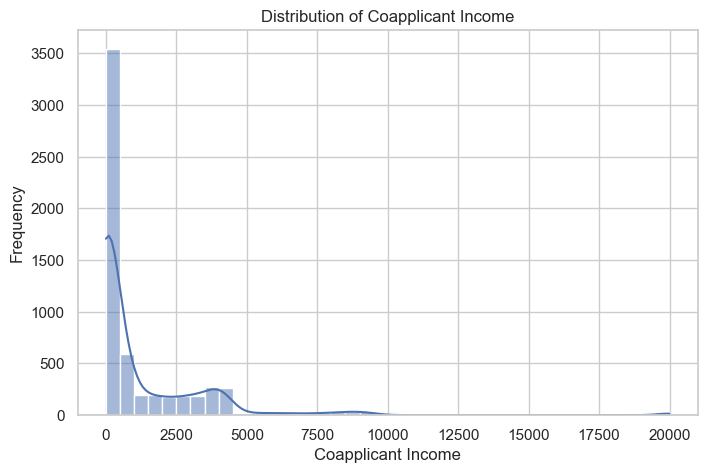

In [720]:
# Distribution plot
plt.figure(figsize=(8,5))
sns.histplot(df['CoapplicantIncome'], bins=40, kde=True)
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.show()

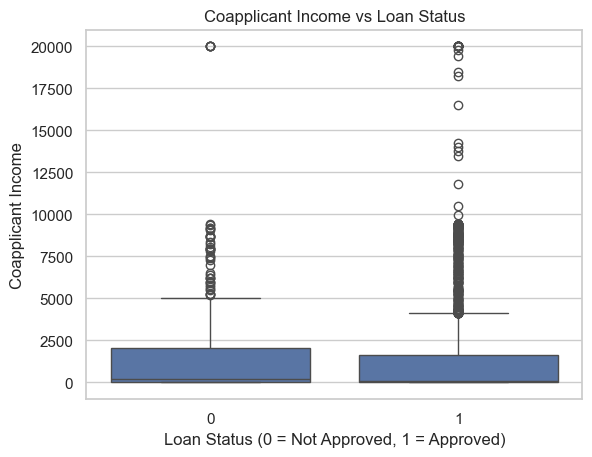

In [721]:
# Loan Status vs Coapplicant Income
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.title('Coapplicant Income vs Loan Status')
plt.xlabel('Loan Status (0 = Not Approved, 1 = Approved)')
plt.ylabel('Coapplicant Income')
plt.show()

In [722]:
# Statistical summary of Loan Amount
print(df['LoanAmount'].describe())

count    5898.000000
mean       97.410478
std       103.483478
min        17.000000
25%        17.000000
50%        42.000000
75%       174.000000
max       700.000000
Name: LoanAmount, dtype: float64


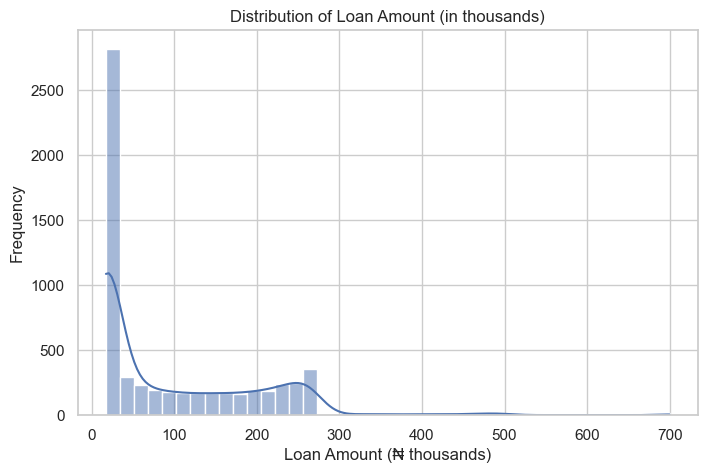

In [723]:
#Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['LoanAmount'], bins=40, kde=True)
plt.title('Distribution of Loan Amount (in thousands)')
plt.xlabel('Loan Amount (₦ thousands)')
plt.ylabel('Frequency')
plt.show()

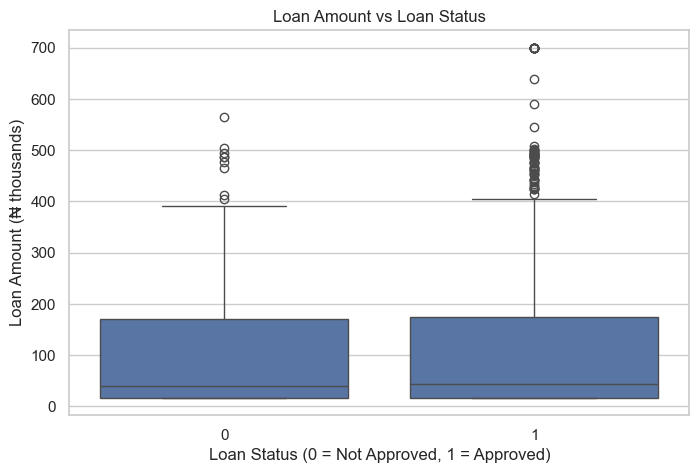

In [724]:
# Boxplot by Loan_Status
plt.figure(figsize=(8,5))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status (0 = Not Approved, 1 = Approved)')
plt.ylabel('Loan Amount (₦ thousands)')
plt.show()

In [725]:
# Statistical summary of Loan Amount Term
print(df['Loan_Amount_Term'].describe())

count    5898.000000
mean      359.114954
std        48.876088
min        12.000000
25%       357.000000
50%       368.000000
75%       372.000000
max       480.000000
Name: Loan_Amount_Term, dtype: float64


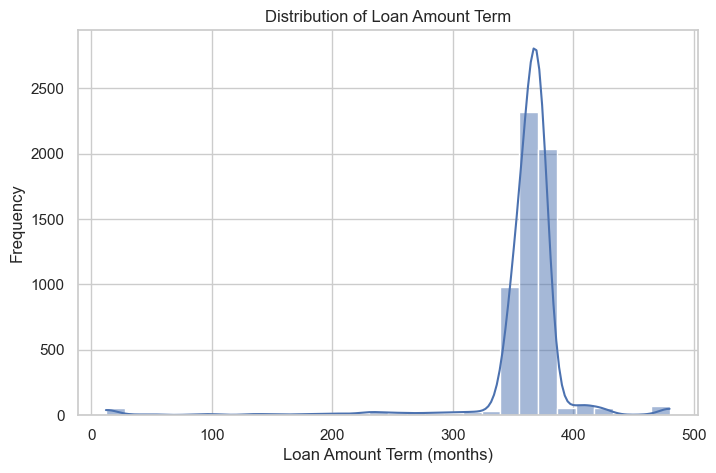

In [726]:
plt.figure(figsize=(8,5))
sns.histplot(df['Loan_Amount_Term'], bins=30, kde=True)
plt.title('Distribution of Loan Amount Term')
plt.xlabel('Loan Amount Term (months)')
plt.ylabel('Frequency')
plt.show()

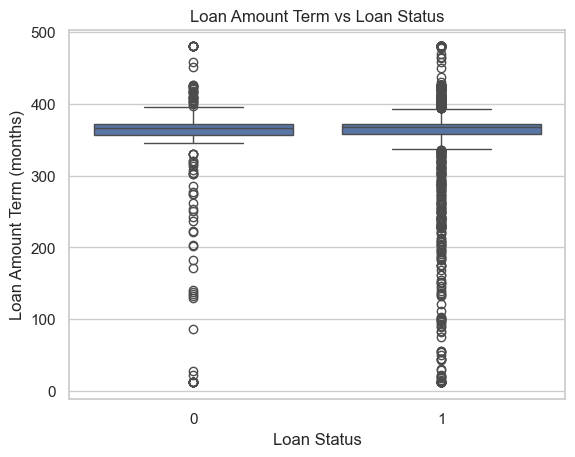

In [727]:
sns.boxplot(x='Loan_Status', y='Loan_Amount_Term', data=df)
plt.title('Loan Amount Term vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Term (months)')
plt.show()

In [728]:
# Check distribution of Credit History
print(df['Credit_History'].value_counts())

Credit_History
1    5429
0     469
Name: count, dtype: int64


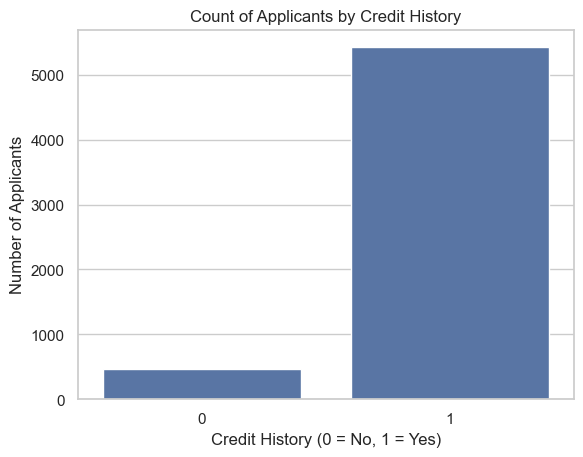

In [729]:
sns.countplot(x='Credit_History', data=df)
plt.title('Count of Applicants by Credit History')
plt.xlabel('Credit History (0 = No, 1 = Yes)')
plt.ylabel('Number of Applicants')
plt.show()

In [730]:
# Credit History vs Loan approval rate

credit_approval = df.groupby('Credit_History')['Loan_Status'].mean()
print(credit_approval)

Credit_History
0    0.831557
1    0.833118
Name: Loan_Status, dtype: float64


In [731]:
# Check the counts of loan approvals per credit history group
print(df.groupby(['Credit_History', 'Loan_Status']).size())

Credit_History  Loan_Status
0               0                79
                1               390
1               0               906
                1              4523
dtype: int64


In [732]:
# Calculate the approval rate per credit history group
approval_rates = df.groupby('Credit_History')['Loan_Status'].mean()
print(approval_rates)

Credit_History
0    0.831557
1    0.833118
Name: Loan_Status, dtype: float64


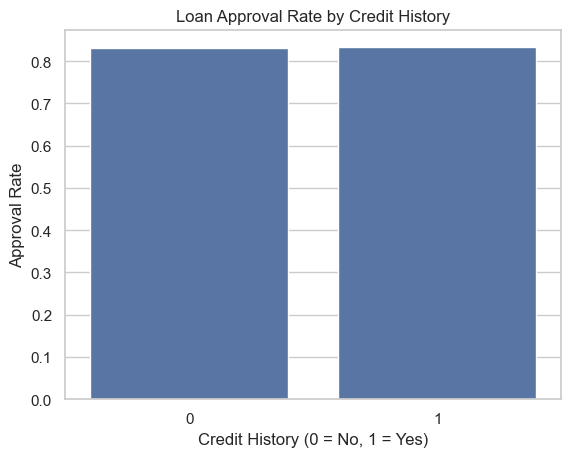

In [733]:
# bar plot to easily see the approval rates
approval_rates = df.groupby('Credit_History')['Loan_Status'].mean().reset_index()
sns.barplot(x='Credit_History', y='Loan_Status', data=approval_rates)
plt.title('Loan Approval Rate by Credit History')
plt.xlabel('Credit History (0 = No, 1 = Yes)')
plt.ylabel('Approval Rate')
plt.show()

In [734]:
# Statistical summary of Total Income
print(df['Total_Income'].describe())

count     5898.000000
mean      9027.981506
std       9479.564621
min        150.000000
25%       3730.000000
50%       7796.748153
75%      11028.641894
max      86414.875663
Name: Total_Income, dtype: float64


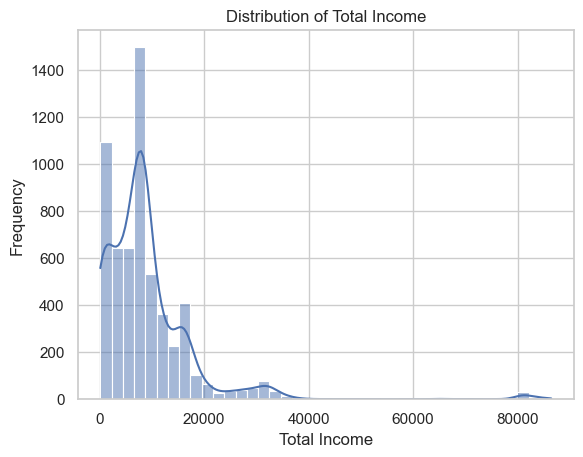

In [735]:
# Distribution plot
sns.histplot(df['Total_Income'], bins=40, kde=True)
plt.title('Distribution of Total Income')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.show()

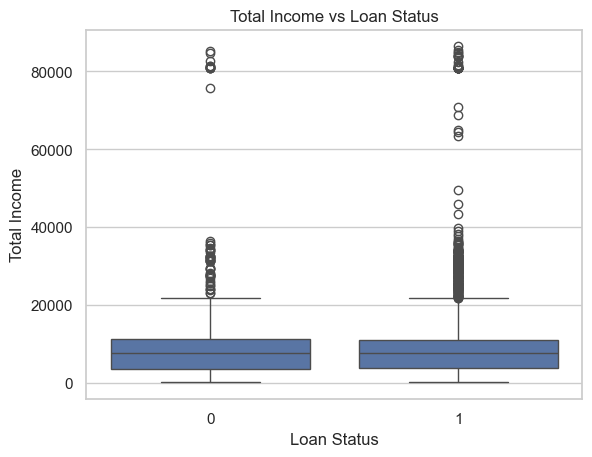

In [736]:
# Total Income vs Loan Status
sns.boxplot(x='Loan_Status', y='Total_Income', data=df)
plt.title('Total Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Total Income')
plt.show()

In [737]:
# Feature Engineering 
# 1. Debt-to-Income Ratio (DTI) shows how much of the applicant's income would go toward repaying the loan — a critical factor in loan approvals.

# Create Debt-to-Income Ratio
df['Debt_Income_Ratio'] = df['LoanAmount'] / (df['Total_Income'] + 1)  # +1 to avoid division by zero

In [738]:
# Check the first few rows to confirm
print(df[['LoanAmount', 'Total_Income', 'Debt_Income_Ratio']].head())

   LoanAmount  Total_Income  Debt_Income_Ratio
0          17   8328.000000           0.002041
1         188   4007.458782           0.046901
2          17   5303.472511           0.003205
3         232    150.000000           1.536424
4          17   8059.000000           0.002109


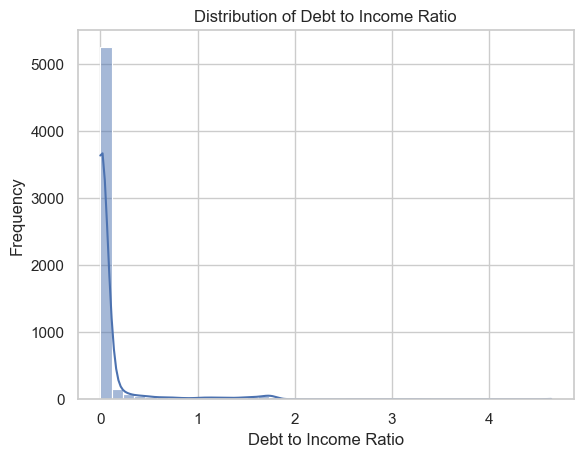

In [739]:
# Distribution Plot
sns.histplot(df['Debt_Income_Ratio'], bins=40, kde=True)
plt.title('Distribution of Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Frequency')
plt.show()

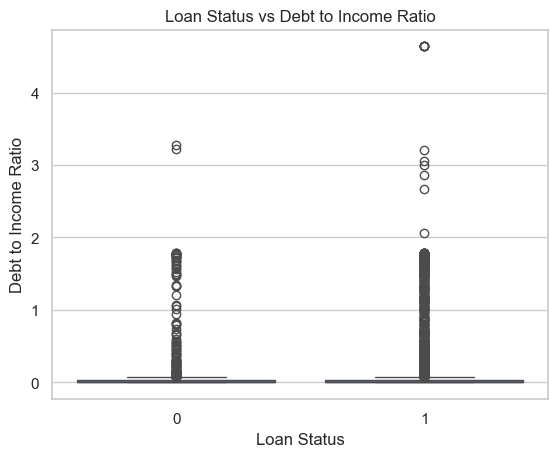

In [740]:
# To see if the Debt_Income_Ratio differs between approved and rejected loans

sns.boxplot(x='Loan_Status', y='Debt_Income_Ratio', data=df)
plt.title('Loan Status vs Debt to Income Ratio')
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio')
plt.show()

In [741]:
# 2. Loan amount to term ratio

df['Loan_to_Term_Ratio'] = df['LoanAmount'] / (df['Loan_Amount_Term'] + 1)  # +1 avoids division by zero

In [742]:
df[['LoanAmount', 'Loan_Amount_Term', 'Loan_to_Term_Ratio']].head()

,LoanAmount,Loan_Amount_Term,Loan_to_Term_Ratio
0,17,363,0.046703
1,188,370,0.506739
2,17,348,0.048711
3,232,359,0.644444
4,17,372,0.045576


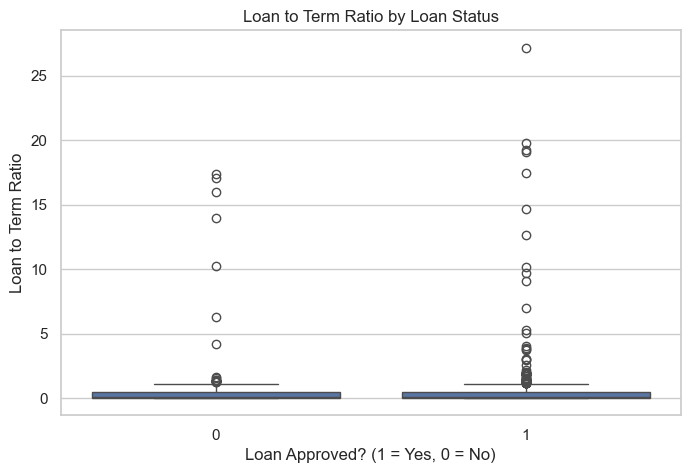

In [743]:
# Add this to avoid warnings
sns.set(style='whitegrid')

plt.figure(figsize=(8, 5))
sns.boxplot(x='Loan_Status', y='Loan_to_Term_Ratio', data=df)
plt.title('Loan to Term Ratio by Loan Status')
plt.xlabel('Loan Approved? (1 = Yes, 0 = No)')
plt.ylabel('Loan to Term Ratio')
plt.show()

In [744]:
# 3. Loan_Amount_per_Month = LoanAmount / Loan_Amount_Term

# Create the feature
df['Loan_Amount_per_Month'] = df['LoanAmount'] / df['Loan_Amount_Term']

# Summary statistics
print(df['Loan_Amount_per_Month'].describe())

count    5898.000000
mean        0.327985
std         0.945960
min         0.035417
25%         0.046832
50%         0.126016
75%         0.489160
max        29.416667
Name: Loan_Amount_per_Month, dtype: float64


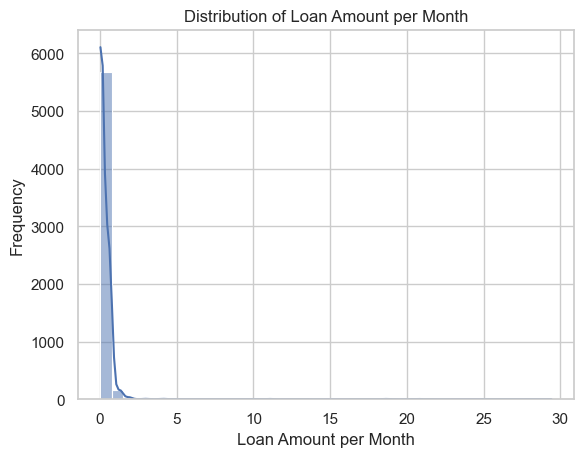

In [745]:
sns.histplot(df['Loan_Amount_per_Month'].dropna(), bins=40, kde=True)
plt.title('Distribution of Loan Amount per Month')
plt.xlabel('Loan Amount per Month')
plt.ylabel('Frequency')
plt.show()

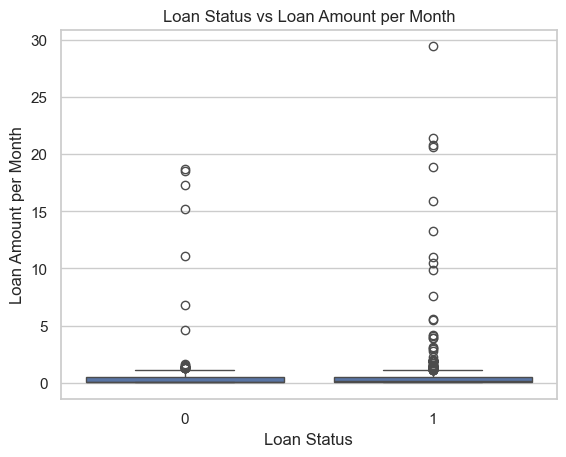

In [746]:
# Boxplot by Loan_Status
sns.boxplot(x='Loan_Status', y='Loan_Amount_per_Month', data=df)
plt.title('Loan Status vs Loan Amount per Month')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount per Month')
plt.show()

In [747]:
# Drop loan ID and ID

df = df.drop(['Loan_ID', 'ID'], axis=1)

In [748]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Debt_Income_Ratio,Loan_to_Term_Ratio,Loan_Amount_per_Month
0,1,1,0,1,0,8328,0.000000,17,363,1,2,1,8328.000000,0.002041,0.046703,0.046832
1,1,1,0,0,0,150,3857.458782,188,370,1,1,0,4007.458782,0.046901,0.506739,0.508108
2,0,0,0,0,0,4989,314.472511,17,348,1,0,0,5303.472511,0.003205,0.048711,0.048851
3,1,1,0,0,0,150,0.000000,232,359,1,1,1,150.000000,1.536424,0.644444,0.646240
4,1,1,1,0,0,8059,0.000000,17,372,1,0,1,8059.000000,0.002109,0.045576,0.045699


In [749]:
# One-hot encode the Property_Area and Dependents columns since they are more than 2 categories
df = pd.get_dummies(df, columns=['Property_Area', 'Dependents'], drop_first=True)

In [683]:
print(df)

         ID   Loan_ID  Gender  Married  Education  Self_Employed  \
0     74768  LP002231       1        1          1              0   
1     79428  LP001448       1        1          0              0   
2     70497  LP002231       0        0          0              0   
3     87480  LP001385       1        1          0              0   
4     33964  LP002231       1        1          0              0   
...     ...       ...     ...      ...        ...            ...   
5893  65288  LP002560       0        1          0              0   
5894  86963  LP002585       1        1          0              0   
5895  69407  LP002175       1        1          0              0   
5896  82002  LP002560       1        0          0              0   
5897  84112  LP002231       1        1          0              0   

      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  ...  \
0                8328           0.000000          17               363  ...   
1                 150    

In [750]:
# Scaling the numerical variables to make prediction better

scaler = StandardScaler()
# Columns to scale
cols_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                 'Loan_Amount_Term', 'Total_Income', 'Debt_Income_Ratio', 'Loan_Amount_per_Month']

# Apply scaling
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [751]:
# Splitting the dataset
# Features: all columns except 'Loan_Status'
X = df.drop('Loan_Status', axis=1)

# Target: the 'Loan_Status' column
y = df['Loan_Status']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [752]:
print(X)

      Gender  Married  Education  Self_Employed  ApplicantIncome  \
0          1        1          1              0         0.059463   
1          1        1          0              0        -0.831213   
2          0        0          0              0        -0.304192   
3          1        1          0              0        -0.831213   
4          1        1          0              0         0.030165   
...      ...      ...        ...            ...              ...   
5893       0        1          0              0        -0.706292   
5894       1        1          0              0        -0.046181   
5895       1        1          0              0        -0.831213   
5896       1        0          0              0        -0.604678   
5897       1        1          0              0        -0.831213   

      CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             -0.526205   -0.777103          0.079494               1   
1              1.102919    0.875475  

In [753]:
print(y)

0       1
1       0
2       0
3       1
4       1
       ..
5893    1
5894    1
5895    1
5896    0
5897    1
Name: Loan_Status, Length: 5898, dtype: int64


In [754]:
print(X.shape, X_train.shape, X_test.shape)

(5898, 18) (4718, 18) (1180, 18)


In [755]:
# Training the model 
# First Model: Logistic Regression
# Logistic Regression is a great starting point for binary classification problems like this (loan-worthy = 1, not = 0)
# We used class_weight='balanced' because the dataset is imbalanced

# Create the model
lr = LogisticRegression(max_iter=1000,  class_weight='balanced', random_state=42)

# Train the data
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [756]:
# Predict on test data
y_pred = lr.predict(X_test)

In [757]:
# Evaluate probabilities for ROC-AUC
y_pred_prob = lr.predict_proba(X_test)[:, 1]

In [758]:
# To evaluate the model
#This will tell us:
#a. Accuracy - how many guesses were correct
#b. Classification report - How well it predicted the loan approved and loan not approved
#c. Confusion matrix - A table showing correct and wrong predictions

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5211864406779662

Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.44      0.23       197
           1       0.83      0.54      0.65       983

    accuracy                           0.52      1180
   macro avg       0.49      0.49      0.44      1180
weighted avg       0.72      0.52      0.58      1180


Confusion Matrix:
 [[ 86 111]
 [454 529]]
ROC AUC Score: 0.49395562119482983


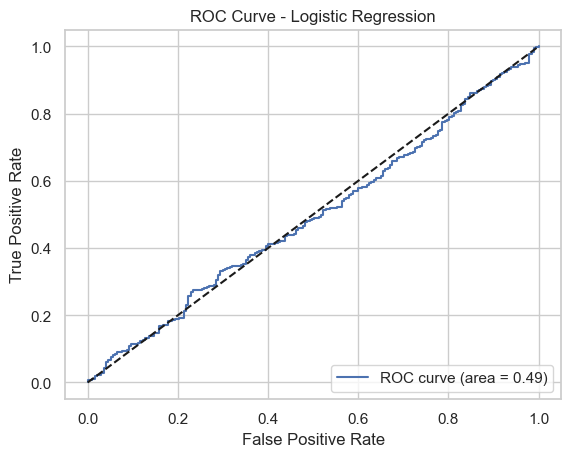

In [759]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [760]:
# Second Model: Decision Tree Classifier

# Create the model
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on test data
y_pred = dt.predict(X_test)

# ROC-AUC
y_pred_proba = dt.predict_proba(X_test)[:, 1]

In [761]:
# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.7110169491525423

Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.14      0.14       197
           1       0.83      0.83      0.83       983

    accuracy                           0.71      1180
   macro avg       0.48      0.48      0.48      1180
weighted avg       0.71      0.71      0.71      1180


Confusion Matrix:
 [[ 27 170]
 [171 812]]
ROC AUC Score: 0.48138661819458717


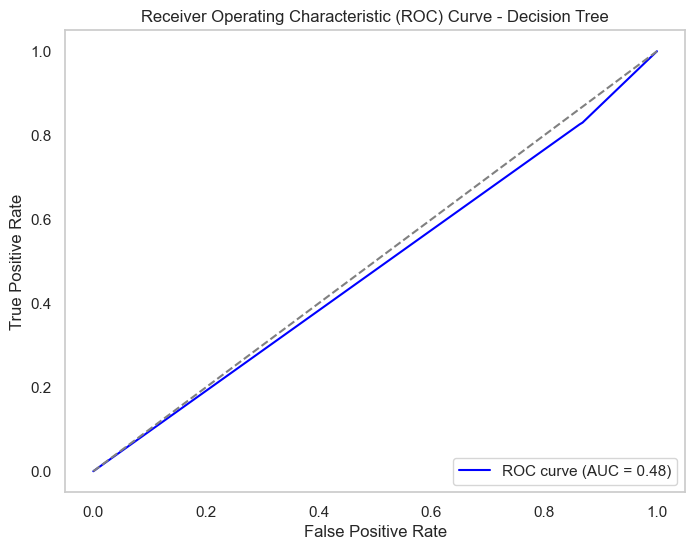

In [762]:
# Plot ROC Curve
# Get False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [763]:
# Third Model: Random Forest Classifier

# Create and train the model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Probability for ROC AUC
y_proba_rf = rf.predict_proba(X_test)[:, 1]  

In [764]:
# Evaluation
print("Accuracy:", rf.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

Accuracy: 0.826271186440678

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.01      0.02       197
           1       0.83      0.99      0.90       983

    accuracy                           0.83      1180
   macro avg       0.50      0.50      0.46      1180
weighted avg       0.72      0.83      0.76      1180

Confusion Matrix:
 [[  2 195]
 [ 10 973]]
ROC AUC Score: 0.42475639165302526


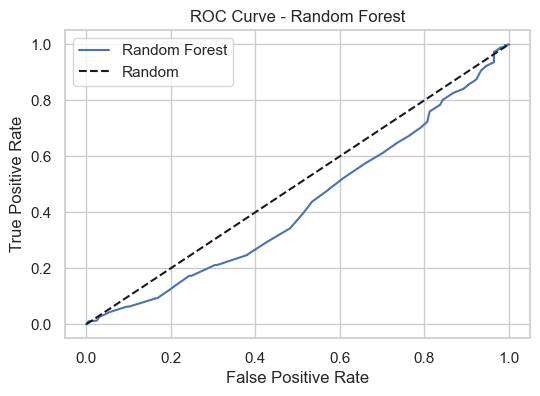

In [765]:
# Plot ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

In [766]:
# Count class 0 and class 1 in the training labels
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()

print("Number of 0s (non-creditworthy) in y_train:", neg_count)
print("Number of 1s (creditworthy) in y_train:", pos_count)

Number of 0s (non-creditworthy) in y_train: 788
Number of 1s (creditworthy) in y_train: 3930


In [767]:
# Compute scale_pos_weight - XGBoost uses this to pay extra attention to the minority class.
scale_pos_weight = neg_count / pos_count
print("scale_pos_weight =", scale_pos_weight)

scale_pos_weight = 0.2005089058524173


In [769]:
# 4. XGBoost classifier
# Create the model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# probabilities for ROC 
y_proba = xgb_model.predict_proba(X_test)[:,1]  

In [770]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.6491525423728813
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.16      0.13       197
           1       0.82      0.75      0.78       983

    accuracy                           0.65      1180
   macro avg       0.46      0.45      0.46      1180
weighted avg       0.70      0.65      0.67      1180

Confusion Matrix:
 [[ 31 166]
 [248 735]]
ROC AUC Score: 0.40867333502021674


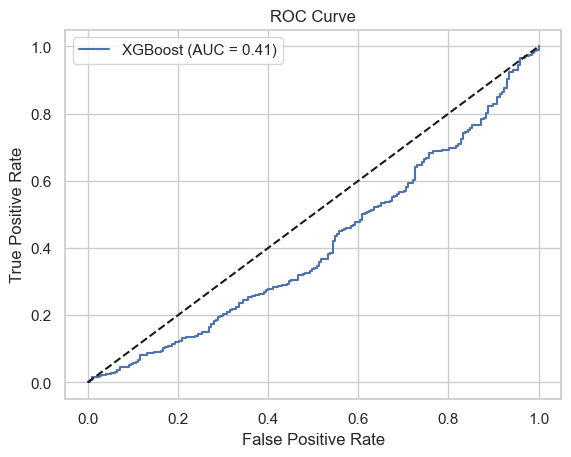

In [771]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [774]:
# Apply SMOTE to balance training data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Evaluation helper function
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("-" * 60)

In [775]:
# Train and evaluate models

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_res, y_res)
evaluate_model(lr_model, X_test, y_test, "Logistic Regression")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_res, y_res)
evaluate_model(dt_model, X_test, y_test, "Decision Tree")

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_res, y_res)
evaluate_model(rf_model, X_test, y_test, "Random Forest")

# XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_res, y_res)
evaluate_model(xgb_model, X_test, y_test, "XGBoost")


Logistic Regression Results:
Accuracy: 0.4906779661016949
Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.45      0.23       197
           1       0.82      0.50      0.62       983

    accuracy                           0.49      1180
   macro avg       0.49      0.47      0.42      1180
weighted avg       0.71      0.49      0.55      1180

Confusion Matrix:
 [[ 88 109]
 [492 491]]
ROC AUC Score: 0.4730959303076152
------------------------------------------------------------

Decision Tree Results:
Accuracy: 0.6872881355932203
Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.11      0.10       197
           1       0.82      0.80      0.81       983

    accuracy                           0.69      1180
   macro avg       0.46      0.46      0.46      1180
weighted avg       0.70      0.69      0.69      1180

Confusion Matrix:
 [[ 21 176]
 [193 790]]
ROC AUC

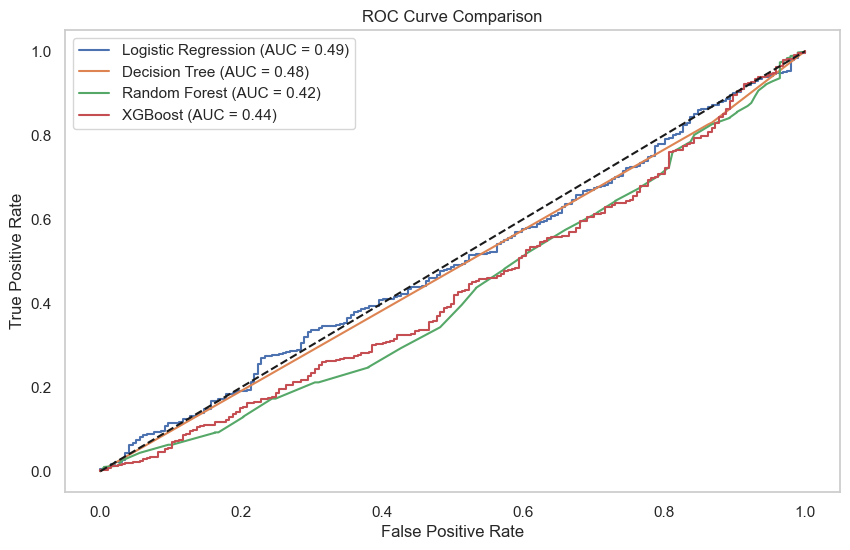

In [781]:
# ROC Curve for the four models
y_pred_prob = lr.predict_proba(X_test)[:, 1]
y_proba_dt = dt.predict_proba(X_test)[:, 1]
y_proba_rf = rf.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curves and AUC
fpr_prob, tpr_lr, _ = roc_curve(y_test, y_pred_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

auc_lr = auc(fpr_prob, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_prob, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

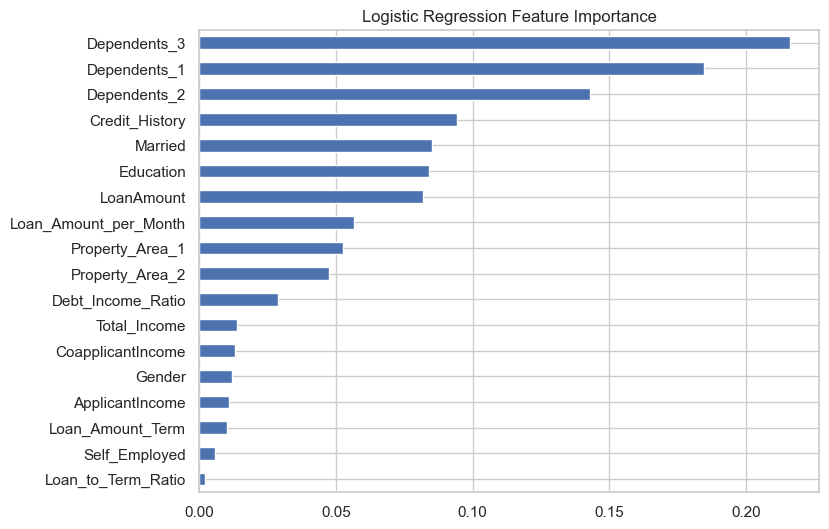

In [784]:
# Feature Importance - Logistic Regression
feature_names = X_train.columns
coefficients = lr.coef_[0]

importance_lr = pd.Series(np.abs(coefficients), index=feature_names).sort_values(ascending=False)
importance_lr.plot(kind='barh', figsize=(8, 6), title="Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

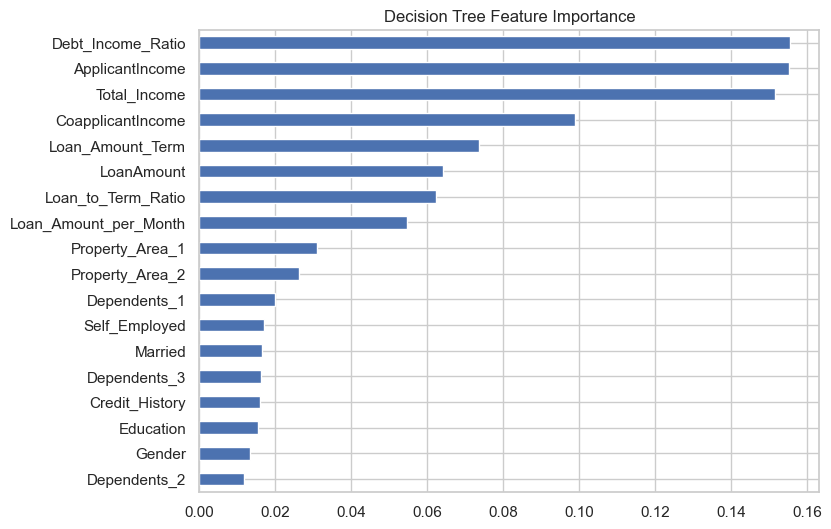

In [785]:
# For Decision Tree
importances_dt = pd.Series(dt.feature_importances_, index=feature_names).sort_values(ascending=False)
importances_dt.plot(kind='barh', figsize=(8, 6), title="Decision Tree Feature Importance")
plt.gca().invert_yaxis()
plt.show()

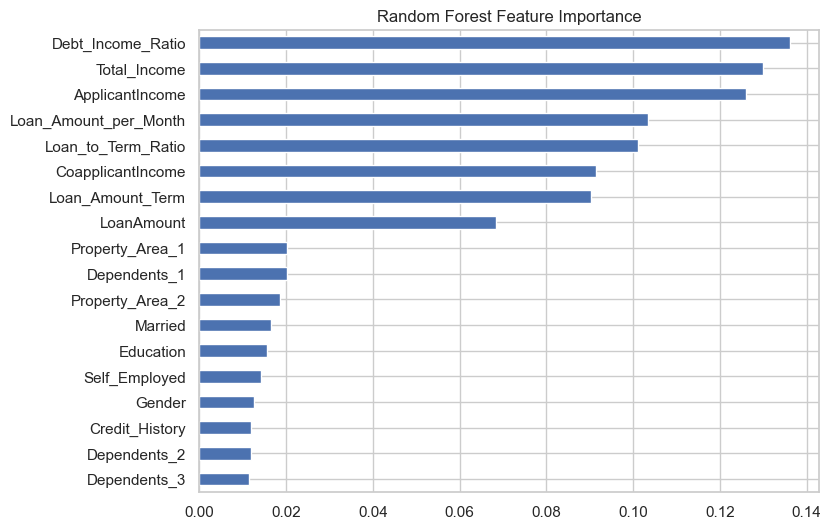

In [786]:
# For Random Forest
importances_rf = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
importances_rf.plot(kind='barh', figsize=(8, 6), title="Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

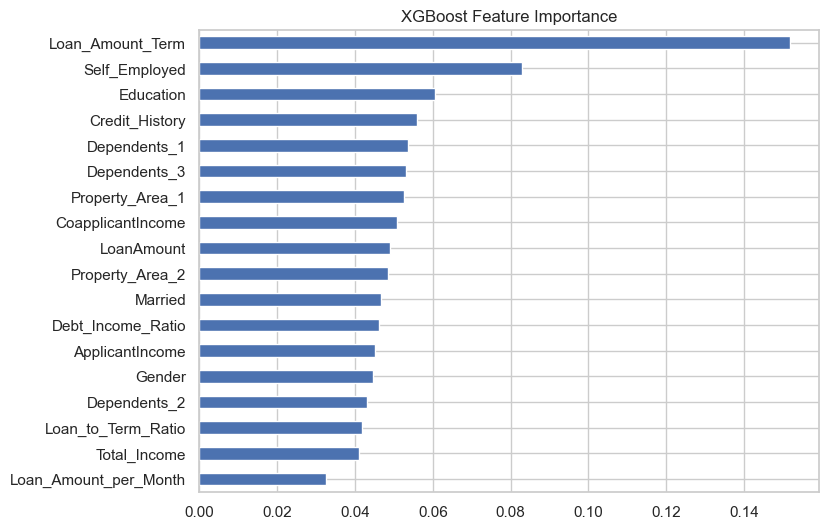

In [787]:
# For XGBoost
importances_xgb = pd.Series(xgb_model.feature_importances_, index=feature_names).sort_values(ascending=False)
importances_xgb.plot(kind='barh', figsize=(8, 6), title="XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()